In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde

Import Data

In [2]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
df_app = pd.DataFrame(app)
df_credit = pd.DataFrame(credit)

Data Scoping

In [4]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
print(df_app.shape, df_credit.shape)

(438557, 18) (1048575, 3)


In [7]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
df_credit['STATUS'].value_counts() #indicates that most the time peoples credit cards are paid on time, C = paid of that month, X = no loan taken, 0 = 1-29 days late on payment, 1 = 30-59 days late, 2 = 60-89 days late, 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [10]:
df_app.isna().sum() #occupation type is the only column with missing values

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Data Preprocessing

In [11]:
#Label Encoding

columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
for entry in columns:
    lb = LabelEncoder()
    df_app[entry] = lb.fit_transform(df_app[entry].values)


In [12]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0


In [13]:
map_credit = {'C' : 1, 'X' : 1, '0' : 1, '1' : 0, '2' : 0, '3' : 0, '4' : 0, '5' : 0}
#maps credit data into a binary form | 1 means the user either took no loans, paid on time or 0-29 days late | 0 means the user  has debt due over 30  days

In [14]:
df_credit["STATUS"] = df_credit["STATUS"].map(map_credit)

In [15]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1


In [16]:
df = df_app.merge(df_credit, how = 'inner', on = ["ID"]) #merge both dataframes

In [17]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,0,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-2,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-3,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-4,1


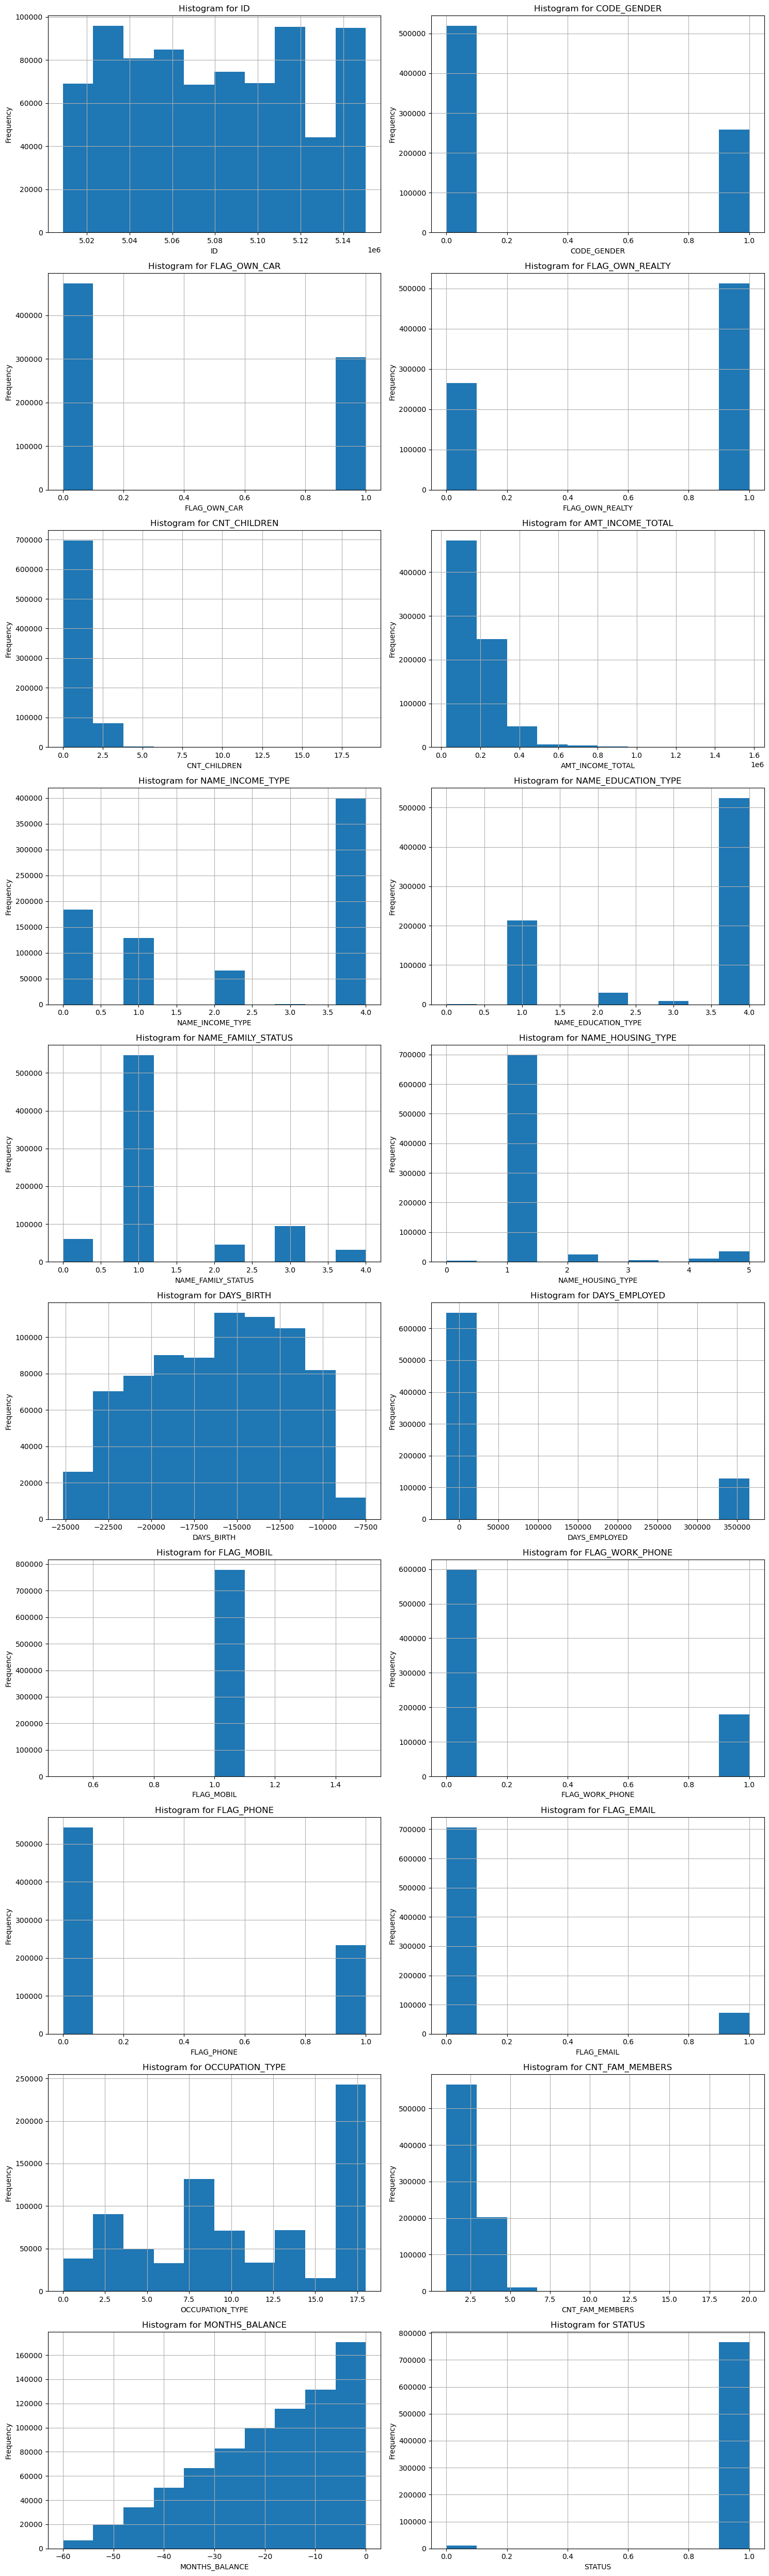

In [37]:
num_rows = len(df.columns) // 2 + len(df.columns) % 2 
num_cols = 2  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

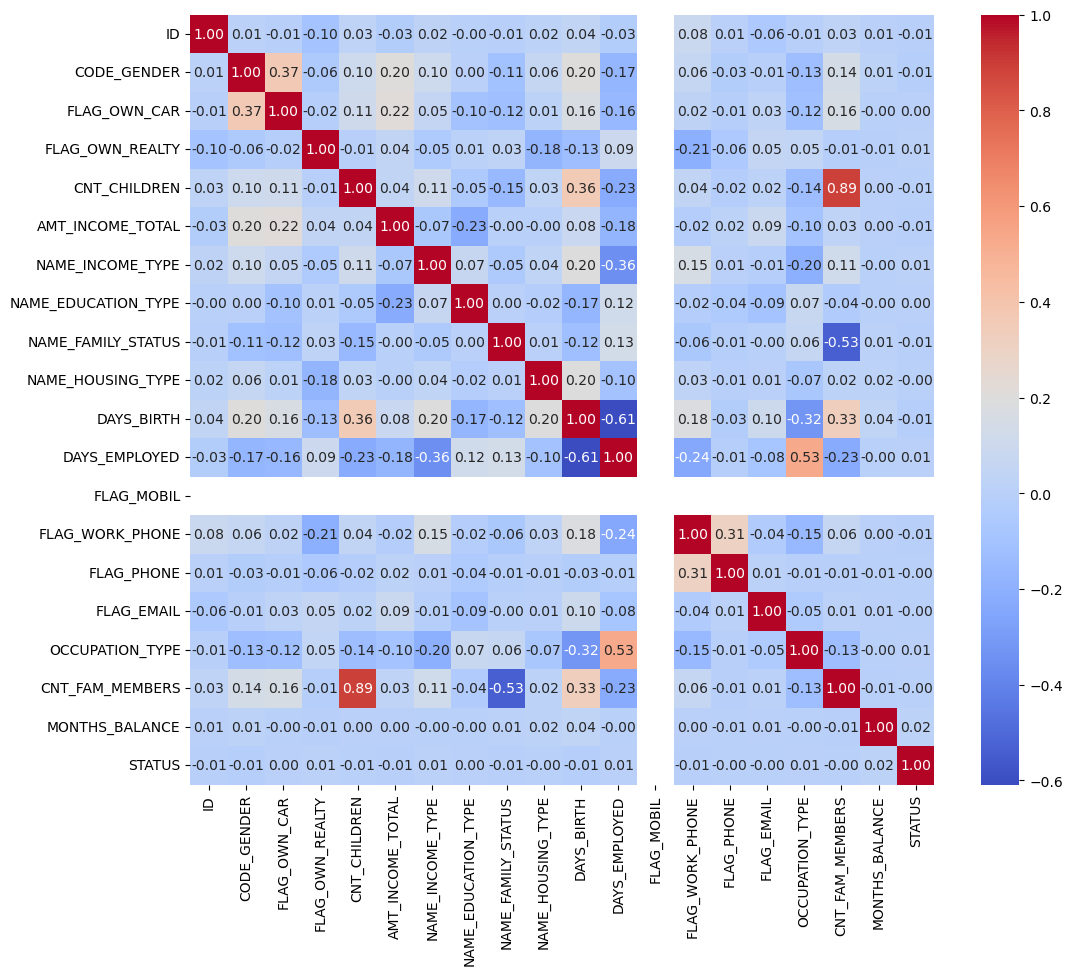

In [38]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
sns.pairplot(df, hue='STATUS')
plt.show()

KeyboardInterrupt: 

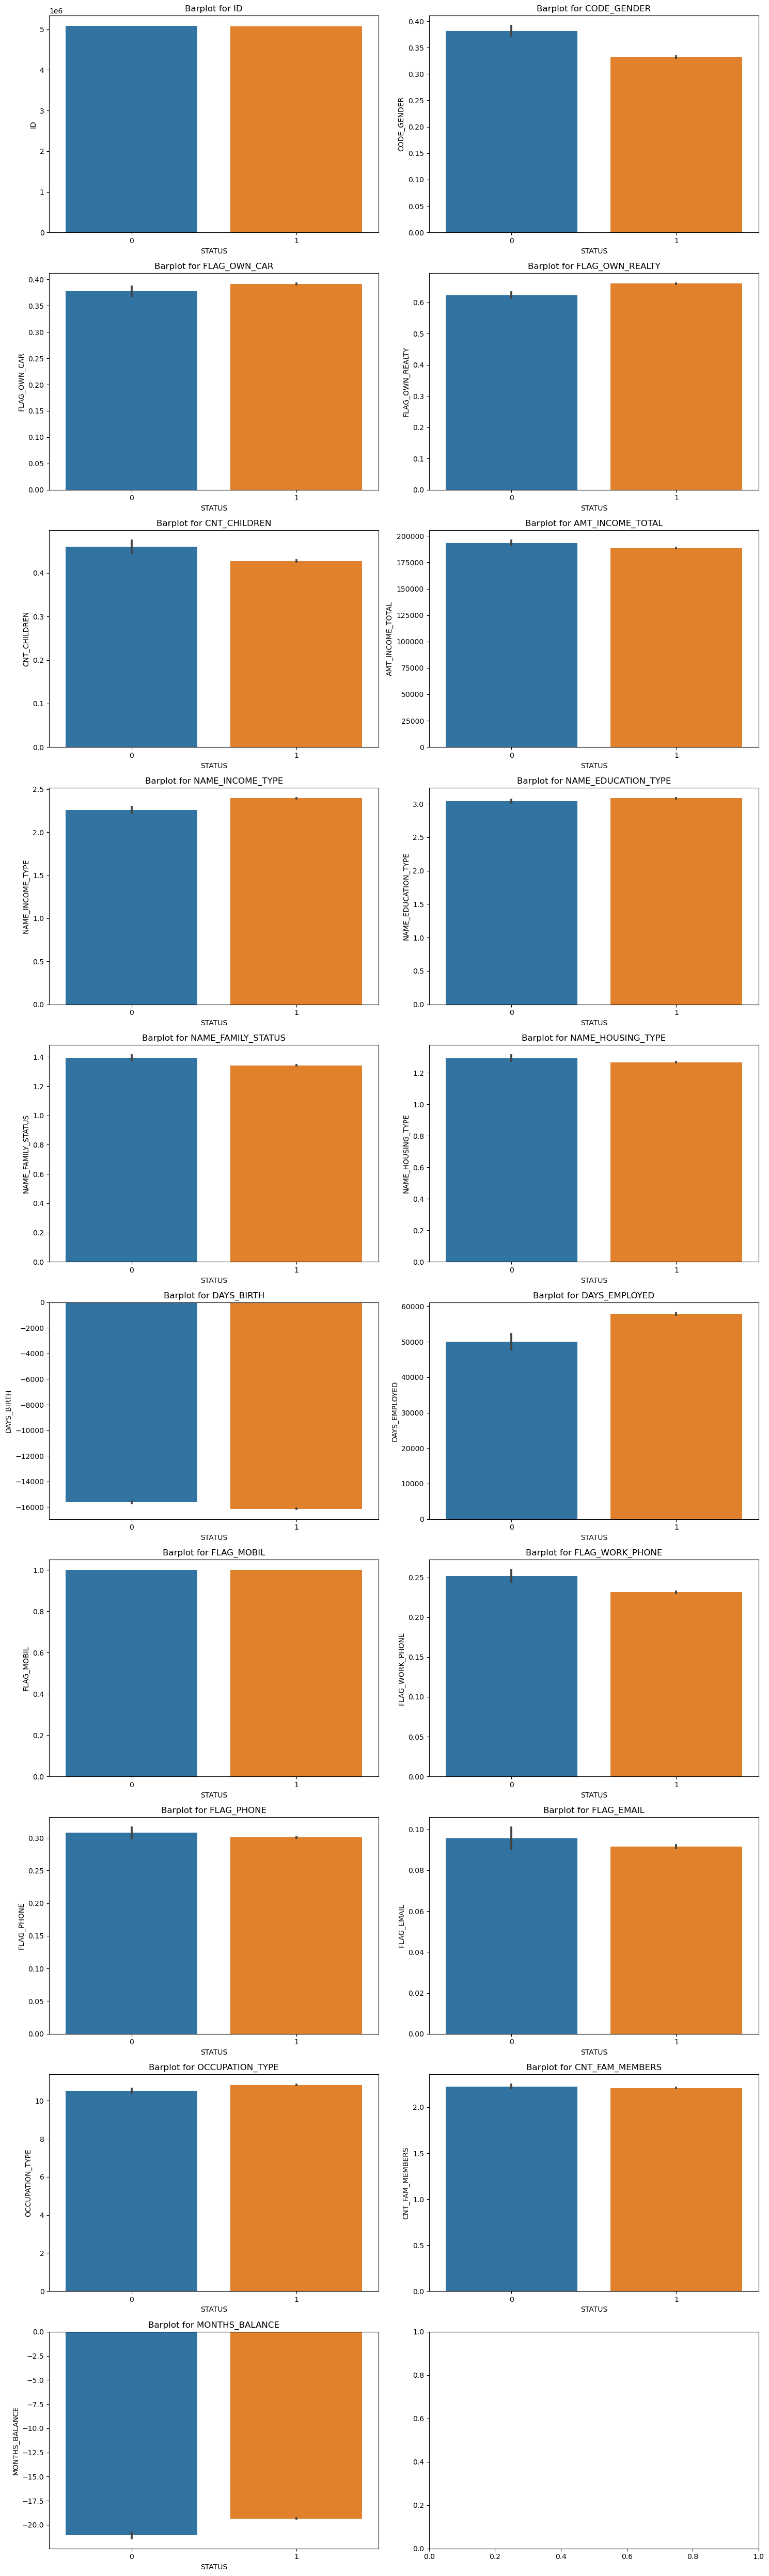

In [35]:
status_column = 'STATUS'
feature_columns = [col for col in df.columns if col != status_column]

num_features = len(feature_columns)
num_rows = num_features // 2 + num_features % 2  
num_cols = 2  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    sns.barplot(x=status_column, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Barplot for {feature}')
    axes[i].set_xlabel(status_column)
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Model Development

In [18]:
X = df.drop("STATUS", axis = 1)
y = df["STATUS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Decision Tree

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [21]:
score = accuracy_score(y_test, pred)
score

0.9831814996496145

In [22]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, final_pred)
print("Accuracy on the Test Set:", accuracy)

Accuracy on the Test Set: 0.986441048456054


In [24]:
print("Classification Report:")
print(classification_report(y_test, final_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.22      0.33      2285
           1       0.99      1.00      0.99    153258

    accuracy                           0.99    155543
   macro avg       0.80      0.61      0.66    155543
weighted avg       0.98      0.99      0.98    155543



In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_pred))

Confusion Matrix:
[[   508   1777]
 [   332 152926]]


In [26]:
random_features = np.array([1, 0, 1, 2, 300000.0, 2, 3, 1, 1, -10000, -2000, 1, 1, 1, 0, 18, 4.0, 12, -1])
random_features = np.array(random_features).reshape(1, -1)

prediction = final_model.predict(random_features)

print("Prediction:", prediction)

Prediction: [1]


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


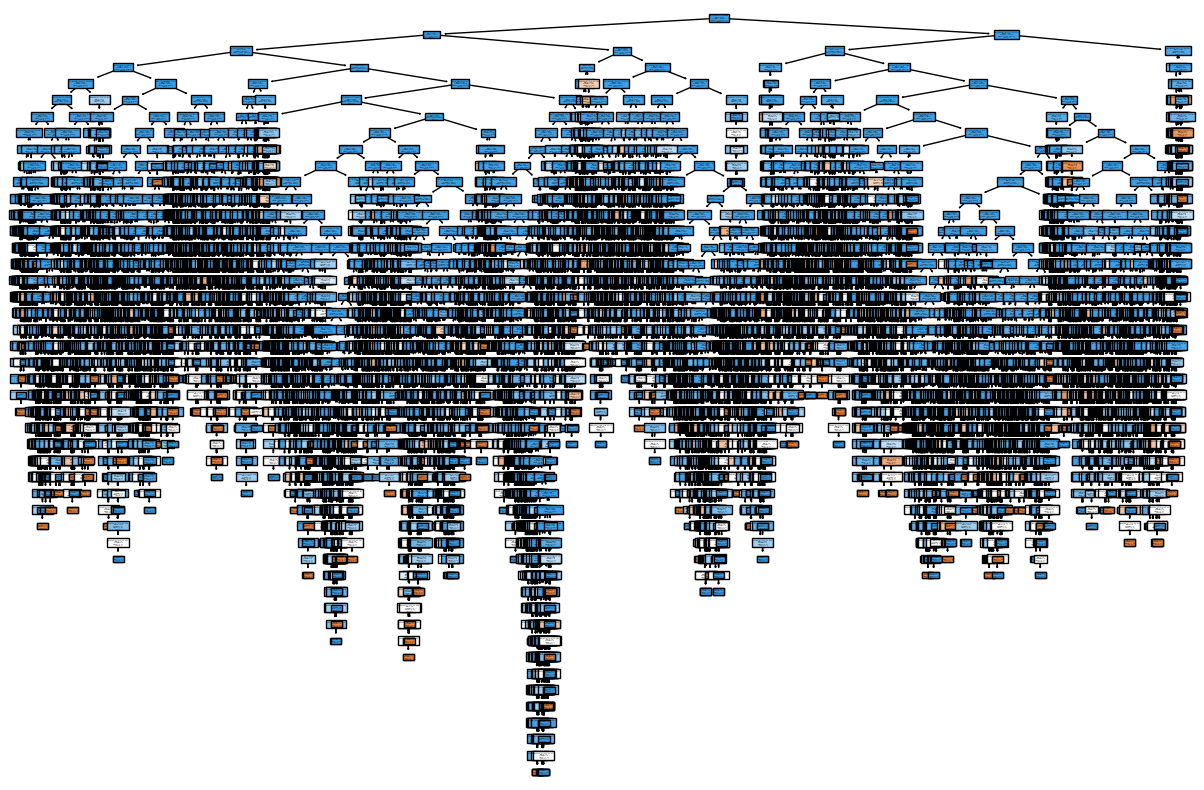

In [29]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

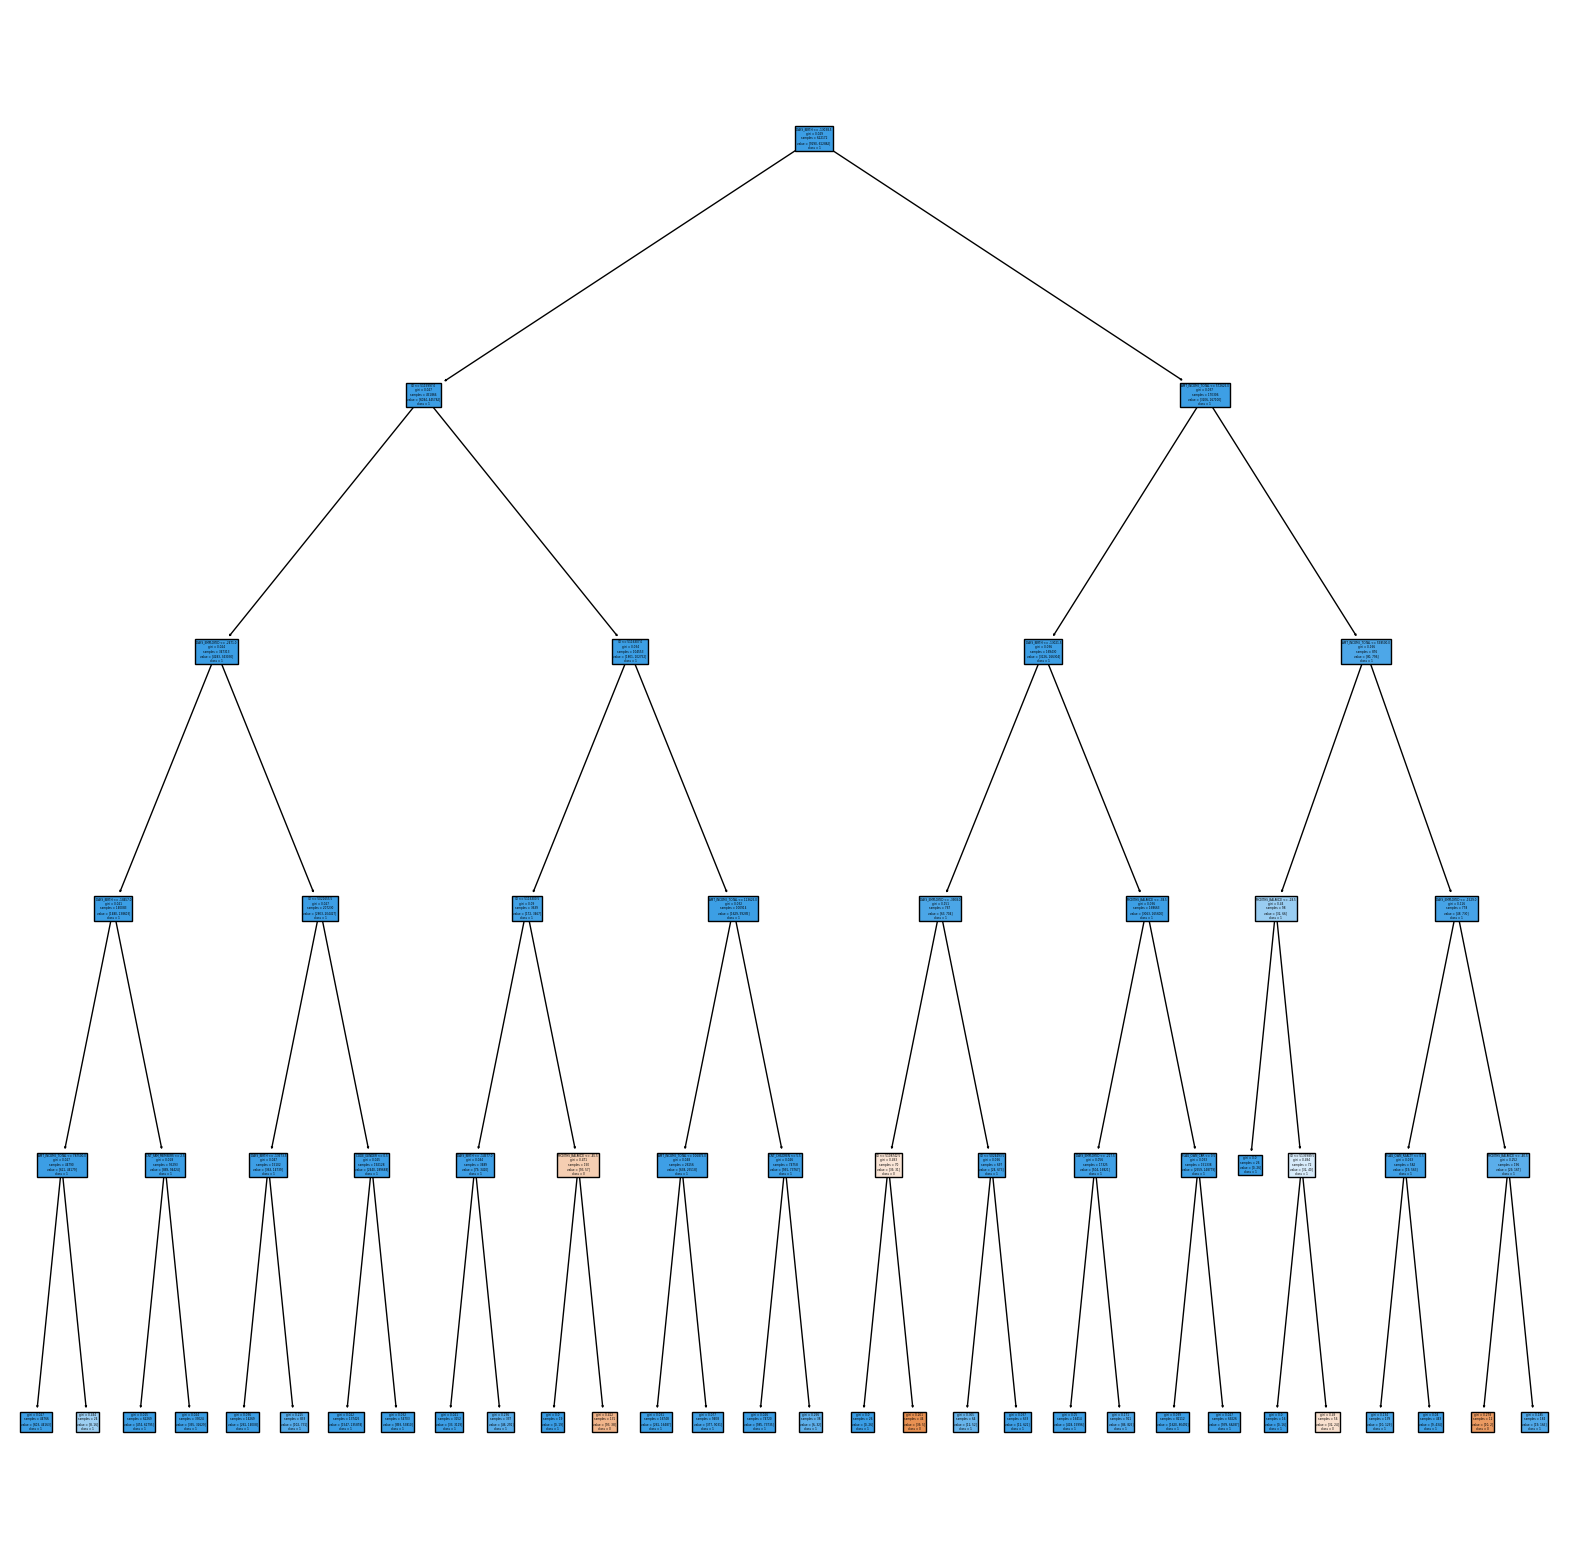

In [42]:
pruned_model = DecisionTreeClassifier(max_depth=5)

# Fit the pruned model
pruned_model.fit(X_train, y_train)

# Plot the pruned tree
plt.figure(figsize=(20, 20))
plot_tree(pruned_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

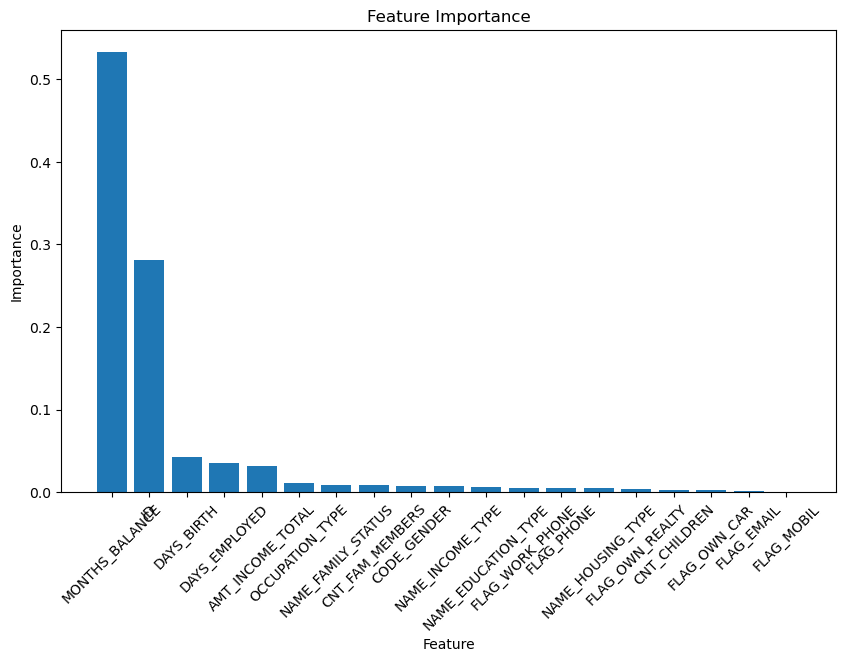

In [43]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()